<a href="https://colab.research.google.com/github/barbosa-loha/Estatistica/blob/main/C%C3%B3pia_de_SDSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
dados = pd.read_csv('/content/astronomy.csv')

Descritiva dos dados:

In [ ]:
dados.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Data Preprocessing & Cleaning

In [ ]:
df=dados.copy()
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Tabela de frquencia da variável em estudo:

In [ ]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

As posições dos objetos podem ser plotadas em uma esfera celeste, permitindo que você veja a distribuição dos objetos no céu

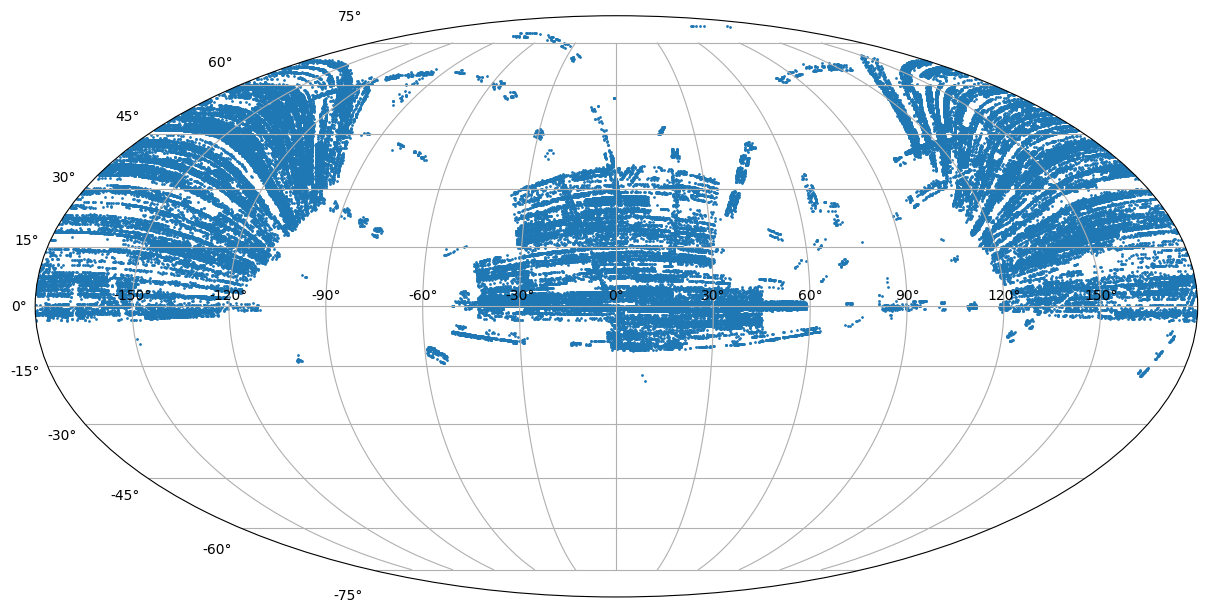

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
coords = SkyCoord(ra=df['alpha']*u.degree, dec=df['delta']*u.degree, frame='icrs')

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(coords.ra.wrap_at(180*u.degree).radian, coords.dec.radian, s=1)
ax.grid()
plt.show()

Um histograma de desvio para o vermelho mostra a distribuição de objetos em diferentes valores de desvio para o vermelho, o que pode fornecer informações sobre a estrutura em grande escala do universo.

Text(0.5, 0, 'intervalo do redshift')

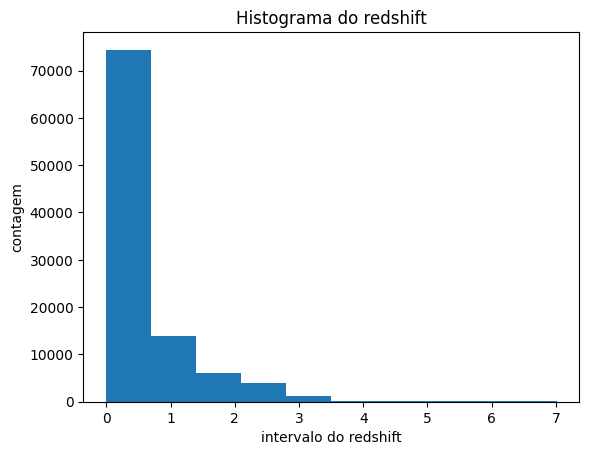

In [ ]:
plt.hist(df['redshift'])
plt.title('Histograma do redshift')
plt.ylabel('contagem')
plt.xlabel('intervalo do redshift')

Com o boxplot comparativo podemos concluir, por exemplo, que o redshift dos quasares apresentam maior variabilidade que o redshift das estrelas e galáxias. Além disso há uma forte presença de valores discrepantes em todas as classes.

<Axes: xlabel='redshift', ylabel='class'>

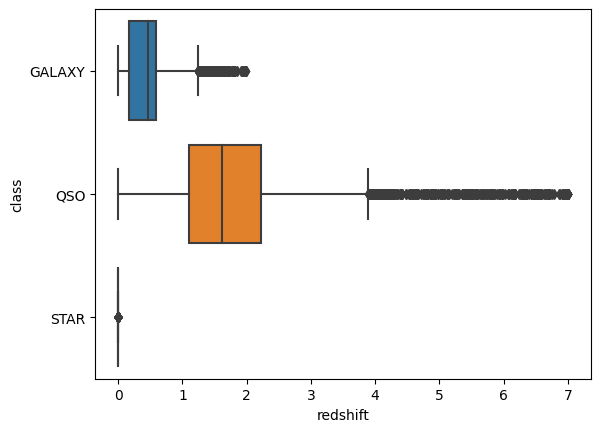

In [ ]:
sns.boxplot(data=df, x="redshift", y="class")


In [ ]:
sns.boxplot(data=df, x="redshift", y="class")

Encontramos a correlação através dessa matriz, que é a correlação de cada coluna no nosso dataframe.

<Axes: title={'center': 'Matriz de correlação'}>

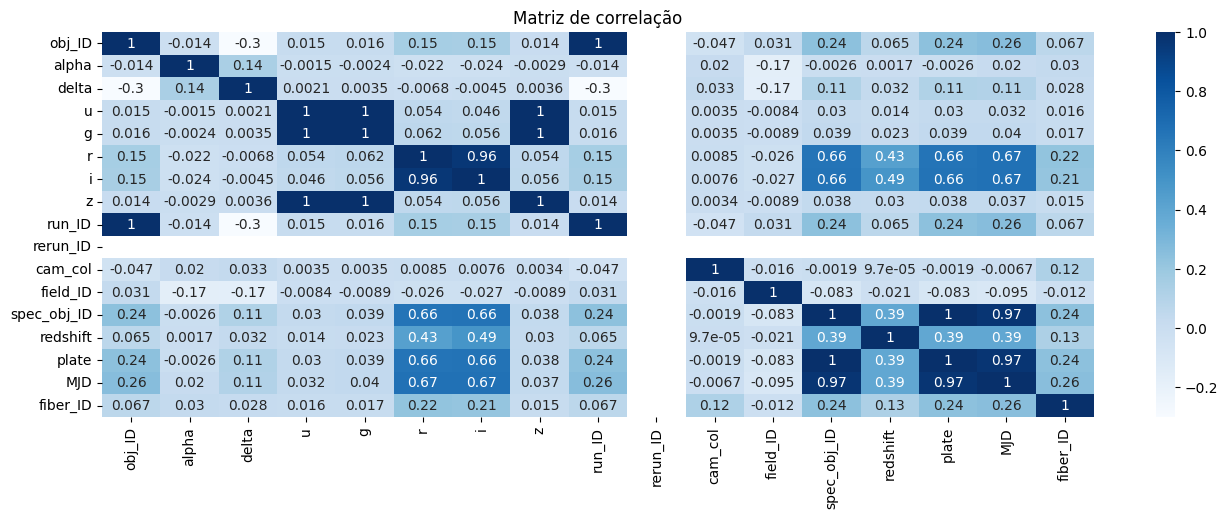

In [ ]:
plt.figure(figsize = (16,5))
plt.title('Matriz de correlação')
sns.heatmap(df.corr() , annot = True , cmap = "Blues")

train test split

Vamos dividir os dados em conjuntos de treinamento e teste. Usaremos amostragem aleatória simples e após, um outro tipo de amostragem (explicaremos ao longo do post). Além disso, O Sklearn requer que todos os recursos e destinos sejam numéricos, de modo que as três classes sejam representadas como inteiros (0, 1, 2). Aqui estamos fazendo uma divisão simples de 67/33. Poderíamos usar também uma divisão de treinamento/teste de 75/25 ou até mesmo 80/20 para garantir que tenhamos dados de treinamento suficientes.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop('class',axis=1).values
y=df['class'].values

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.33 , random_state= 42)

Amostragem com SMOTE:

Para balancearmos o dataset de treino, podemos em vez de excluir observações da classe majoritária, adicionar novas observações da classe minoritária. Se replicasse essas observações existentes da classe minoritária não estaríamos adicionando nenhuma nova informação para o nosso modelo, e com isto podemos criar novas observações através das já existentes no conjunto de treino, levando-se em consideração pequenas diferenças de aleatoriedade.

Assim, vamos utilizar a função SMOTE(), que faz uma super-amostragem da classe minoritária (QSO).

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
print('Original ytrain dataset shape %s' % Counter(y_train))
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print('Resampled ytrain dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({'GALAXY': 59445, 'STAR': 21594, 'QSO': 18961})
Original ytrain dataset shape Counter({'GALAXY': 39820, 'STAR': 14505, 'QSO': 12675})
Resampled ytrain dataset shape Counter({'GALAXY': 39820, 'QSO': 39820, 'STAR': 39820})


Assim, o problema de desbalanceamento está resolvido.

# Modelagem

## RandomForestClassifier

Agora vamos encaixar um classificador de "floresta aleatória" em nosso conjunto de treinamento. Na maioria das vezes, usaremos as configurações padrão, já que elas são bastante robustas.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=7 , max_features=3,n_estimators= 100, oob_score=True)
rf.fit(x_train_smote, y_train_smote )

RandomForestClassifier(max_depth=7, max_features=3, oob_score=True)

Uma exceção é a estimativa "Out-of-bag": por padrão, uma estimativa de erro Out-of-bag não é calculada, então precisamos dizer ao objeto classificador que queremos isso.

In [ ]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.969
Mean accuracy score: 0.96


Podemos olhar também comparar as estimativas com a amostragem por SMOTE:

In [ ]:
rf.score(x_train_smote, y_train_smote)

0.9704168759417379

In [ ]:
rf.score(x_test,y_test)

0.9603030303030303

In [ ]:
print (classification_report(y_test  , rf.predict(x_test)))

              precision    recall  f1-score   support

      GALAXY       0.98      0.95      0.97     19625
         QSO       0.89      0.93      0.91      6286
        STAR       0.98      1.00      0.99      7089

    accuracy                           0.96     33000
   macro avg       0.95      0.96      0.95     33000
weighted avg       0.96      0.96      0.96     33000



## Avaliação do modelo

Matrix de confusão:

Esta é uma matriz cujos valores diagonais são contagens de verdadeiros positivos, enquanto valores fora da diagonal são contagens de falsos positivos e falsos negativos para cada classe, uma em relação à outra.

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
v = confusion_matrix(y_test , rf.predict(x_test))

Text(0.5, 1.0, 'Matriz de confusão')

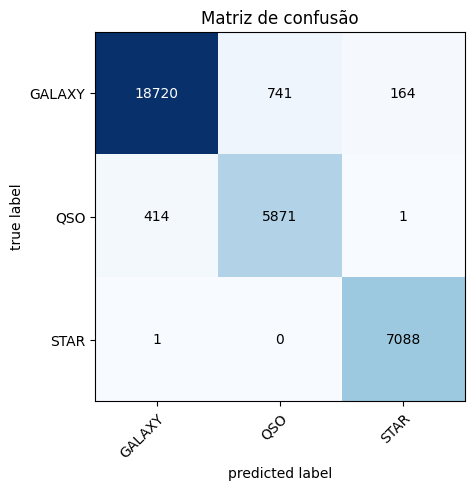

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(v , class_names=["GALAXY","QSO","STAR"], cmap='Blues')
plt.title('Matriz de confusão')

Isso nos permite saber que nosso modelo separa corretamente os exemplos de Galaxia, no entanto há uma pequena quantidade de confusão ao tentar distinguir entre Quasar e Estrela.